<a href="https://colab.research.google.com/github/mnrlmuttaqin/gojeksentimentanalysis/blob/main/GOJEK%20APP%20SENTIMENT%20ANALYSIS%20USING%20SVM%20AND%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
# Load dataset kedalam dataframe
import pandas as pd
import numpy as np
df = pd.read_excel('review gojek.xlsx')
print(df.shape)

(2462, 4)


In [193]:
# Melihat sample data
df.sample(20)

,name,date,review,rating
448,jiwomdf,2019-05-18,found bug in samsung A5 2017 notification is b...,5
635,Fatmarisa Winda Anugrah,2019-08-03,This app is good. Especially for withdraw. Tha...,5
1155,Matthew Wirjan,2020-01-29,as it turns out this app doesn't provide what ...,1
1278,Reuben Philip,2020-03-15,It's a very good app. Love it. I use this app ...,5
848,A Google user,2019-10-13,Fantastic service but it keeps getting my loca...,4
2401,Hayaty Hayatt Hassan,2020-10-13,No comment So far I'm use taking GOJECK n expe...,5
168,swajaya tirta,2019-02-20,Good service & very helpful in emergency situa...,5
289,Annisa Setiyar,2019-03-26,easy to use and all the service you need is he...,5
1065,Rathinakumar Shanmugam,2019-12-15,Much better than Grab Transport Service. Howev...,5
1616,Marta Harjanti Sari,2020-06-07,"Easy, and Helpful!",5


# ANALISIS STATISTIKA DESKRIPTIF

Melihat gambaran umum tentang data ulasan pengguna aplikasi Gojek

In [194]:
# Melihat banyaknya ulasan dari tiap rating
df['rating'].value_counts()

5    1044
1     756
3     245
2     237
4     180
Name: rating, dtype: int64

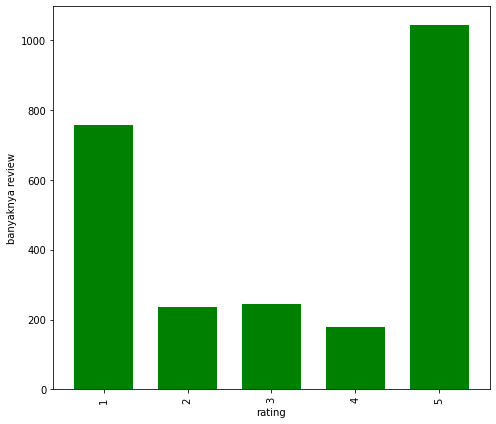

In [195]:
#Melihat distribusi banyak review berdasarkan rating
import matplotlib.pyplot as plt
_, ax1 = plt.subplots(figsize=(7,6))
stars_histogram = df['rating'].value_counts().sort_index()
stars_histogram.plot(kind='bar', width=0.7, color='green')
plt.xlabel('rating')
plt.ylabel('banyaknya review')
plt.tight_layout()
plt.show()

# PREPROCESSING

Pada tahap ini bertujuan untuk membersihkan dataset dari noise yang ada

# Case Folding

In [196]:
#Mengubah semua huruf dalam dataset menjadi huruf kecil (lower text)
df['review'] = df['review'].str.lower()
df.sample(20)

,name,date,review,rating
1124,mey nurintan,2020-01-11,i always have problems when i need to top up m...,2
2074,Melin Hutauruk,2020-08-31,good application 👌 and super helping too,5
2281,Raynhard Kadmaer,2020-09-27,i want to purchase tokens but error and error....,2
846,Ame 愛,2019-10-12,the new feature of go-points expiring is so st...,1
511,Adam Rizky,2019-06-20,"neat application, really help me on my daily s...",4
510,Winny Saputra,2019-06-19,"why is it that every odd date, i always got ev...",1
342,AdityaFF,2019-04-08,"best i think the app is good enough, but pleas...",3
1178,Hartini Santosa,2020-02-09,"so far safe, comfortable and cheap",5
1271,Mulida Mutiara,2020-03-14,quite sceptical when i first installed the app...,5
19,Twinny Max,2019-01-06,the most idiotic app ever... waited for so lon...,1


In [197]:
df.to_excel('hasil case folding.xlsx')

# Filtering

In [198]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [199]:
#Menghapus stopword
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#fungsi untuk menghapus stopword
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new
df.sample(10)

#menghapus stopword dari teks
df['review'] = [remove_stopwords(r.split()) for r in df['review']]
df.sample(20)

,name,date,review,rating
461,Siew Yin,2019-05-23,"thing able trace drivers message, sometime hur...",4
1202,Akiyume Murasaki,2020-02-16,"good app. getting pricey, even location close ...",1
1970,Jerry Khoo,2020-08-13,app getting n lousy. getting driver far away. ...,3
2259,Reza Putra,2020-09-23,"map crucial app. setting accuracy difficult, c...",3
2110,Jason Judihardjo,2020-09-04,stupid app blocks money without notice. took l...,1
874,Isoka Amanah Kurnia,2019-10-24,oh well freeze devices? okay. done without war...,1
1574,natalia djauhari,2020-06-02,can't open new updated app. already uninstall ...,1
1811,A Ilham,2020-07-10,"ui filled brim ads. oh, wow! can't even change...",3
1645,Reza Aditya,2020-06-09,please rollback previous ui/ux.,2
190,A Google user,2019-02-23,please upgrade gopay system aa takes longer wa...,5


In [200]:
df.to_excel('hasil filtering.xlsx')

# Cleansing

In [201]:
#Pembersihan teks dari tab, new line, back slice, emoticon, chinese word, etc.

import string
import re #regex library

def cleansing(text):
    #Menghapus tab, new line, dan back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ")
    #Menghapus non ASCII (emoticon, chinese word, etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    #Menghapus mention, link, hastag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",text).split())
    #Menghapus incomplete URL
    return text.replace("http://"," ").replace("https://"," ")
df['review'] = df['review'].apply(cleansing)
df.sample(20)

,name,date,review,rating
1572,Muthia Syafira,2020-06-02,cant connect gopay google play.,1
906,yohana manroe,2019-11-01,"far, good. excellent customer service. truly s...",5
208,A Google user,2019-02-28,"fast, easy used, good services",5
2026,Song Kwang Lee,2020-08-21,recently app keeps opening without activating ...,1
686,Rini Rizki,2019-08-22,good application order transportation foods.,5
43,Berlian S.,2019-01-15,"helpful app whenever need travel, order food, ...",5
916,Wuhan Wuhan,2019-11-02,please fix gps issue. app keeps requesting loc...,3
880,Liliputz Faye,2019-10-26,used gojek app beginning new update get worst ...,1
1025,Abdul Ghani,2019-12-02,im annoyed app. disgusting!! 5 food festival v...,1
917,Margareta Monica Haryono,2019-11-02,helpful easy use.,5


In [202]:
df.to_excel('hasil cleansing.xlsx')

# Remove Number

In [203]:
#Menghapus angka

def remove_number(text):
    return re.sub(r"\d+", "", text)
df['review'] = df['review'].apply(remove_number)
df.sample(20)

,name,date,review,rating
80,Msyou Neverever,2019-01-25,great! need drivers tho! price good hopefully ...,5
405,Ribka Simatupang,2019-04-29,must say app really helpful. though usually dr...,3
1407,Hadi Syah Putra,2020-05-12,"cool helpful application, many features inside...",5
1562,Reyhan Naufal Hakim,2020-06-01,new version app often force closes heavy even ...,1
1400,whatmakesyoudream 94,2020-05-10,new updates keep reinstalling can't opened cra...,1
1961,Irene Constantia,2020-08-11,super bad experience. gojek blocked account. u...,1
1503,ht dec,2020-05-27,cannot detect exact locations,1
287,Rick H.,2019-03-25,features like grab. way check prices can't sel...,2
1425,Danny Utomo,2020-05-14,"cannot upgrade wallet said identity card used,...",1
572,k.,2019-07-15,gopay top-up mobile banking failed information...,1


In [204]:
df.to_excel('hasil remove angka.xlsx')

# Remove Punctuation

In [205]:
df.to_excel('hasil remove punctuation.xlsx')

In [206]:
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))
df['review'] = df['review'].apply(remove_punctuation)
df.sample(20)

,name,date,review,rating
1805,Camilla Callisa M.P,2020-07-08,gampang log nya,5
877,Regins Wang,2019-10-26,good hope able book locations trip eg first d...,5
975,Nick See,2019-11-20,good application set destination user friendly,5
828,Mukhammad Kun Tahtadi Noor,2019-10-05,helpful daily activity love it,5
1930,An Do,2020-08-05,great app fast convinient,5
2406,Irwan Kurniawan,2020-10-13,aware provide prudent step a cancellation opti...,1
2213,jerry mark,2020-09-18,car icon gps always movingchats drivers always...,1
1910,Ian Budi Kurniawan,2020-08-01,notifications list use gosend marketplace ofte...,1
1255,G S,2020-03-12,using years complaint,5
696,Christ Josh,2019-08-25,ive using app almost years invested around ...,1


# Tokenizing

In [207]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [208]:
#Pemisahan teks menjadi potongan kata per kata yang disebut sebagai token
from nltk.tokenize import word_tokenize
#NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)
df['review'] = df['review'].apply(word_tokenize_wrapper)
df.sample(20)

,name,date,review,rating
2321,Rafi Mahes Pradana,2020-10-02,"[ui, design, make, difficult, use]",2
1655,Veprakecvara,2020-06-09,"[ui, latest, update, sucks, friendly]",1
554,Susetya Nata,2019-07-07,"[best, app, support, highly, mobility, dinamic...",5
1130,Chungii Vee,2020-01-16,"[good, service, food, delivery, easy, use, lik...",5
273,Birawan Teja,2019-03-21,"[good, helpfull, n, easy, use, specially, able...",5
990,Ajay Kumar,2019-11-24,"[user, friendly, excellent, driver, service, e...",5
1479,Hamonmaru,2020-05-23,"[good, app, preserving, food]",4
1414,Pitra Sekarhandini,2020-05-13,"[versi, terbaru, berat, untuk, dibuka, lama, s...",4
2404,ferdi arrahman,2020-10-13,"[app, friendly, use, see, gopay, balance, no, ...",1
1676,Metha Mbulan,2020-06-12,"[older, version, much, better, dont, know, fea...",2


In [209]:
df.to_excel('hasil tokenizing.xlsx')

# Remove stopword

In [210]:
#Memilih kata-kata penting dan menghapus yang tidak penting
#Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak penting
#Contoh stopword dalam bahasa inggris adalah "thing", "many", "also", etc.

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#Menambahkan stopwords tambahan
stop_words.extend(['thats','itll','youll','im','us','me','it','dont','cant','even','always'])
txt_stopword = pd.read_csv('stopwords.txt', names=["stopwords"],header=None)
#Memasukkan stopwords tambahan ke list NLTK corpus
stop_words.extend(txt_stopword["stopwords"][0].split(' '))
stop_words = set(stop_words)

#Menghapus stopwords pada data
def stopwords_removal(words):
    return [word for word in words if word not in stop_words]
df['review'] = df['review'].apply(stopwords_removal)
df.sample(20)


,name,date,review,rating
1212,ANDRE P,2020-02-21,"[sometimes, missing, wrong, addresses, directi...",5
798,Surfinah Santosa,2019-09-27,"[iam, glad, thanksfull, kindnes, helpfull, ser...",5
391,Sarah Hanifah,2019-04-26,"[order, movie, ticket, says, movie, exist]",5
2155,Dyana S,2020-09-12,"[usefull, application]",5
99,Chuming SG,2019-01-27,"[option, save, pay, credit, card, trip, taken,...",3
179,Abdul Wachid,2019-02-21,"[simple, procedure, fast]",5
461,Siew Yin,2019-05-23,"[thing, able, trace, drivers, message, sometim...",4
1693,Nindito Bagaskara,2020-06-13,"[ive, honestly, never, seen, worse, ui, latest...",1
1799,Nana SR,2020-07-07,"[good, application, functional]",5
851,Suprianto Kamijaya,2019-10-16,"[user, friendly, fast, usefull, one, favorite,...",5


In [211]:
df.to_excel('hasil remove stopword.xlsx')

In [212]:
df.to_excel('hasil preprocessing text.xlsx')

In [213]:
#Load data hasil PREPROCESSING TEXT
import pandas as pd
import numpy as np

df= pd.read_excel('hasil preprocessing text.xlsx')
df.sample(20)

,Unnamed: 0,name,date,review,rating
2070,2070,Danny Wee,2020-08-30,"['make', 'exception', 'input', 'address', 'man...",1
1598,1598,Dinda Radito,2020-06-05,"['hardly', 'open', 'app', 'lately', 'app', 'ke...",3
577,577,Nurul Muthia Amin,2019-07-20,"['easy', 'use', 'helpful']",5
1336,1336,Tiki Nelson,2020-04-22,"['filled', 'profile', 'using', 'american', 'ph...",1
813,813,Erlangga Zildjian,2019-10-01,"['need', 'feature', 'able', 'send', 'photos', ...",5
445,445,Trisha Gilang Saraswati,2019-05-16,"['everytime', 'order', 'something', 'want', 's...",5
1111,1111,Adwitiya Irene,2020-01-06,"['apps', 'went', 'great', 'open', 'go', 'ride'...",3
2028,2028,Michael Shu,2020-08-22,"['using', 'app', 'since', 'first', 'launched',...",1
895,895,Rio Nike,2019-10-30,"['dear', 'gojek', 'issue', 'everytime', 'tryin...",4
1551,1551,Albertus Hartanto,2020-06-01,"['awesome', 'application', 'helpful']",5


In [214]:
#Menggabungkan daftar token menjadi dokumen string tunggal

import ast
def join_text(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
df['review'] = df['review'].apply(join_text)
df.sample(20)

,Unnamed: 0,name,date,review,rating
106,106,Hanggia Primadita,2019-01-29,helpful especially gotix watching movies witho...,5
2441,2441,maulana rahman,2020-10-19,far already great job unfortunately time cance...,1
784,784,Lilies Achmadi,2019-09-24,appropriate helpful app poor map application u...,5
1363,1363,Gilang Ramadhan,2020-05-02,many canceled order driver gopay error,2
859,859,Angga Saputra,2019-10-21,convenient app easy use reliable would definit...,3
2195,2195,Sasipim Taoklang,2020-09-17,app seems promising really wanted give try unf...,2
2053,2053,Brams Leasiwal,2020-08-27,nice app luv et helps enough,5
1078,1078,nathania alvita,2019-12-22,helpfull application everything easy thank gojek,5
2183,2183,Lee EunHae,2020-09-15,application connect google maps ive updated ap...,1
1958,1958,Puji Widarti,2020-08-11,application keep crashing giving rate driver,3


In [215]:
df.to_excel('new dataset review gojek.xlsx')

# Frekuensi dan TF-IDF

In [216]:
#Fungsi untuk memplot kata yang paling sering muncul
from nltk import FreqDist
import seaborn as sns

def freq_words(x,terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #Memilih 20 kata yang paling sering muncul
    d = words_df.nlargest(columns="count", n=terms)
    plt.figure(figsize=(25,15))
    ax = sns.barplot(data=d, x="word", y="count")
    ax.set(ylabel = 'Count')
    plt.show()

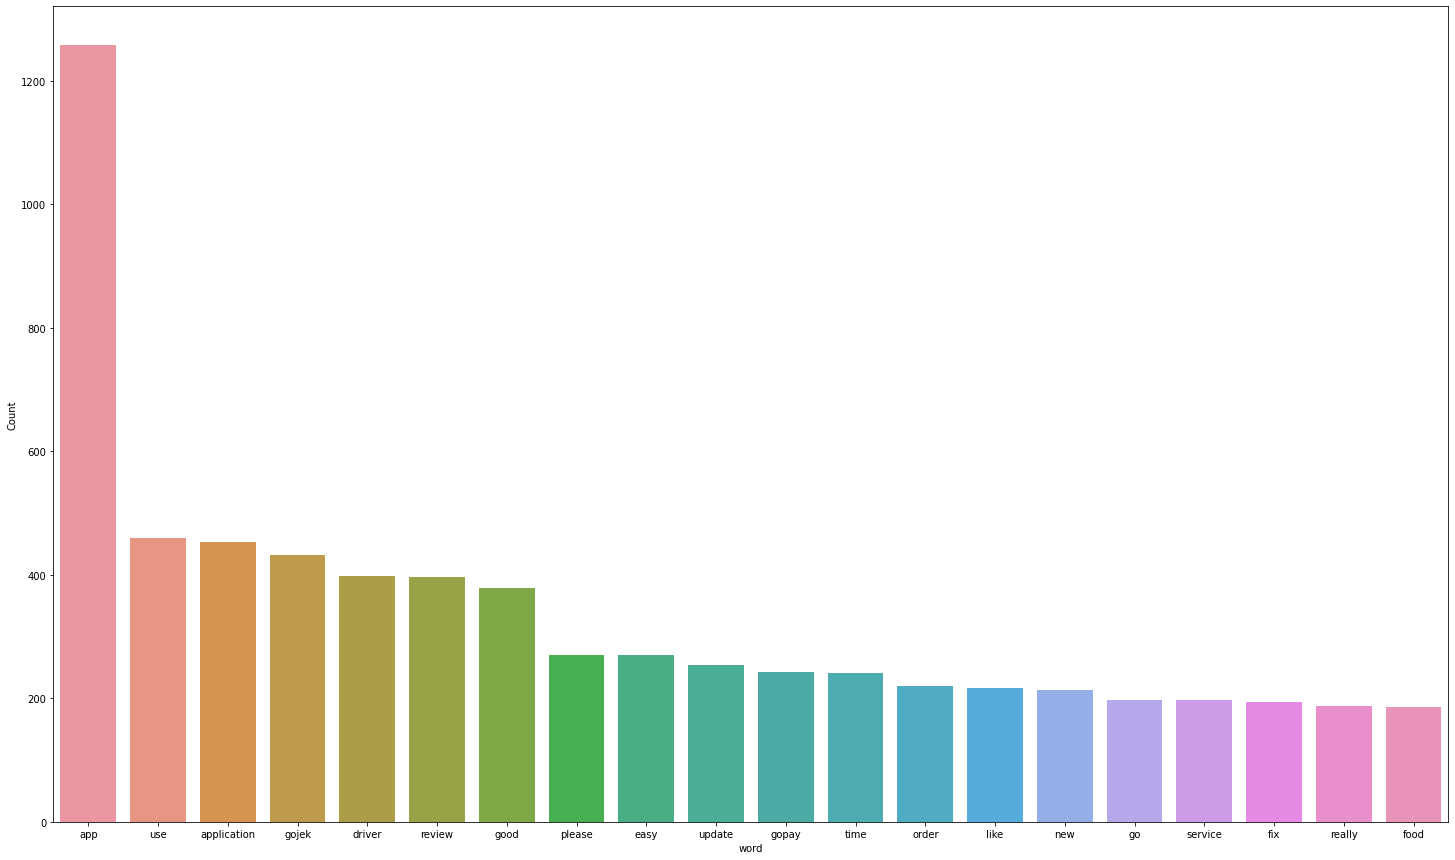

In [217]:
#Plot kata yang paling sering muncul
freq_words(df['review'],20)

In [218]:
#TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cvec = CountVectorizer(stop_words='english',min_df=1, max_df=.5, ngram_range=(1,2))
cvec

CountVectorizer(max_df=0.5, ngram_range=(1, 2), stop_words='english')

In [219]:
import difflib
#body_list = df['body'].tolist()
review_text_list = df['review'].tolist()

#body = body_list
reviews = review_text_list
s = difflib.SequenceMatcher(None, reviews).ratio()
print("ratio:",s,"\n")

ratio: 0.0 



In [220]:
#Menghitung semua n-gram dalam dokumen
from itertools import islice
from nltk.corpus import stopwords
global str

cvec.fit(review_text_list)
list(islice(cvec.vocabulary_.items(),20))

len(cvec.vocabulary_)

27353

In [221]:
cvec = CountVectorizer(stop_words='english',min_df=.0024, max_df=.5, ngram_range=(1,2))
cvec.fit(review_text_list)
len(cvec.vocabulary_)

1089

In [222]:
cvec_counts = cvec.transform(review_text_list)
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %2f%%' %(100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (2462, 1089)
nonzero count: 25548
sparsity: 0.952886%


In [223]:
#menghitung frekuensi kemunculan kata
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(),'occurrences': occ})
counts_df.sort_values(by='occurrences',ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,occurrences
35,app,1258
1004,use,460
70,application,454
388,gojek,433
286,driver,398
800,review,396
397,good,379
295,easy,270
988,update,254
405,gopay,243


In [224]:
#Sekarang kita memiliki jumlah kata untuk setiap dokumen
#Kita dapat menggunakan Tf-Idf untuk menghitung bobot setiap dokumen

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<2462x1089 sparse matrix of type '<class 'numpy.float64'>'
	with 25548 stored elements in Compressed Sparse Row format>

In [225]:
#Melihat 20 kata teratas dengan weight rata-rata tf-idf

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(),'weight':weights})
weights_df.sort_values(by='weight',ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
35,app,0.056208
70,application,0.033991
1004,use,0.033715
397,good,0.032979
295,easy,0.031060
388,gojek,0.026319
286,driver,0.025485
446,helpful,0.022374
988,update,0.020058
296,easy use,0.019829


# PELABELAN

In [226]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [227]:
#Pelabelan data, data akan berlabel negatif jika nilai compound<0,0 dan akan berlabel positif jika nilai compound >=0,0
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['review'].apply(lambda x: sid.polarity_scores(x))
def convert(x):
    if x < 0.0:
        return "negative"
    else:
        return "positive"
df['result'] = df['sentiment'].apply(lambda x:convert(x['compound']))

x = df.groupby(['review','name'])['result'].value_counts(normalize=True)
x = df.groupby(['review'])['result'].value_counts(normalize=True)
y = x.loc[(x.index.get_level_values(1) == 'negative')]
#print(y[y>0.2])
print(df.shape)
df.sample(20)

(2462, 7)


,Unnamed: 0,name,date,review,rating,sentiment,result
2190,2190,Abraham L O Tambunan,2020-09-16,upgraded plus use paylater update update avail...,2,"{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp...",negative
990,990,Ajay Kumar,2019-11-24,user friendly excellent driver service everyti...,5,"{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...",positive
1678,1678,airlangga miraq,2020-06-12,new ui become much complicated prefer version,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",positive
418,418,Fitzgerald Fabien,2019-05-03,easy eat easy going everywhere want,5,"{'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'comp...",positive
1477,1477,EPIC,2020-05-23,dear gojek really appreciate effort making app...,4,"{'neg': 0.07, 'neu': 0.678, 'pos': 0.252, 'com...",positive
1168,1168,Anastasia Fely,2020-02-04,features better online taxi application,5,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",positive
142,142,Zulhilmi Azmi,2019-02-09,please fix add card tried input cards want opt...,1,"{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'comp...",positive
35,35,ea 2wo,2019-01-12,true pleasure using app detailed makes like co...,5,"{'neg': 0.0, 'neu': 0.347, 'pos': 0.653, 'comp...",positive
1428,1428,Arfan Arrasyid,2020-05-15,software hang need reinstall,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",positive
1174,1174,appdevcoder linux,2020-02-07,fantastic app much cheaper blue taxi non regis...,5,"{'neg': 0.032, 'neu': 0.618, 'pos': 0.35, 'com...",positive


In [228]:
#Banyak data yang berlabel positif & negatif
df['result'].value_counts()

positive    1798
negative     664
Name: result, dtype: int64

In [229]:
ClassificationUlasanGojek = df
ClassificationUlasanGojek = df.drop(columns=['rating','date','name','Unnamed: 0'])
ClassificationUlasanGojek.sample(10)

,review,sentiment,result
2433,like app maybe suggest optional food deleted f...,"{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp...",positive
901,easy application helps transportation order de...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",positive
560,pretty sure theres feature typed wanted menu m...,"{'neg': 0.096, 'neu': 0.683, 'pos': 0.221, 'co...",positive
1404,give far away driver fix range annoying want w...,"{'neg': 0.138, 'neu': 0.824, 'pos': 0.038, 'co...",negative
159,good aplication helpful,"{'neg': 0.0, 'neu': 0.149, 'pos': 0.851, 'comp...",positive
2036,please make app gps accurate experience inaccu...,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",positive
1651,since last update open app terrible please fix...,"{'neg': 0.25, 'neu': 0.565, 'pos': 0.185, 'com...",negative
2228,make repayment paylater eventhough gopay balan...,"{'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...",negative
19,idiotic app ever waited long acct approval wat...,"{'neg': 0.293, 'neu': 0.518, 'pos': 0.189, 'co...",negative
591,using application years getting worse worse se...,"{'neg': 0.265, 'neu': 0.394, 'pos': 0.341, 'co...",positive


In [230]:
df.to_excel('hasil pelabelan.xlsx')

In [231]:
#Mengubah result
label = []
for index, row in ClassificationUlasanGojek.iterrows():
    if row["result"] == 'positive' :
        label.append(1)
    else:
        label.append(0)
ClassificationUlasanGojek["label"] = label
ClassificationUlasanGojek = ClassificationUlasanGojek.drop(columns=['result'])
ClassificationUlasanGojek.sample(20)

,review,sentiment,label
553,updated application balance sufficient fail wa...,"{'neg': 0.335, 'neu': 0.544, 'pos': 0.121, 'co...",0
2070,make exception input address manually,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
1600,seem register favourite destinations app help ...,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",1
2151,mr nadiem pls help gopay account saldo idrk bl...,"{'neg': 0.18, 'neu': 0.651, 'pos': 0.169, 'com...",0
425,honestly great app id like give stars stars ar...,"{'neg': 0.05, 'neu': 0.664, 'pos': 0.287, 'com...",1
1622,dude please bring old ui back great trying bet...,"{'neg': 0.061, 'neu': 0.654, 'pos': 0.286, 'co...",1
651,good app number occasions car registration mat...,"{'neg': 0.066, 'neu': 0.654, 'pos': 0.28, 'com...",1
1346,happened version backdoor strange activities l...,"{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...",0
1580,days open application please fix problem,"{'neg': 0.3, 'neu': 0.444, 'pos': 0.256, 'comp...",0
1939,tampilan aplikasinya user friendly bangeeeettt...,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou...",1


In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection,svm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# SPLIT DATA

In [233]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(ClassificationUlasanGojek['review'],ClassificationUlasanGojek['label'],test_size=0.25, stratify=ClassificationUlasanGojek['label'], random_state=1)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(ClassificationUlasanGojek['review'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [234]:
len(Train_X)

1846

In [235]:
len(Test_X)

616

# METODE KLASIFIKASI

# (1). SUPPORT VECTOR MACHINE

KERNEL LINEAR

In [236]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

SVM1 = svm.SVC(kernel='linear')
SVM1.fit(Train_X_Tfidf,Train_Y)
prediksi_SVM1 = SVM1.predict(Test_X_Tfidf)

In [237]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [238]:
# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(Test_Y, prediksi_SVM1))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(Test_Y,prediksi_SVM1))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(Test_Y, prediksi_SVM1))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(Test_Y, prediksi_SVM1))

f1 score hasil prediksi adalah: 
0.8998946259220232
accuracy score hasil prediksi adalah: 
0.8457792207792207
precision score hasil prediksi adalah: 
0.8557114228456913
recall score hasil prediksi adalah: 
0.9488888888888889


Kernel Polynomial

In [239]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

SVM2 = svm.SVC(kernel='poly', degree=8)
SVM2.fit(Train_X_Tfidf,Train_Y)
prediksi_SVM2 = SVM2.predict(Test_X_Tfidf)

In [240]:
# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(Test_Y, prediksi_SVM2))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(Test_Y,prediksi_SVM2))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(Test_Y, prediksi_SVM2))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(Test_Y, prediksi_SVM2))

f1 score hasil prediksi adalah: 
0.8450704225352113
accuracy score hasil prediksi adalah: 
0.7321428571428571
precision score hasil prediksi adalah: 
0.7317073170731707
recall score hasil prediksi adalah: 
1.0


Kernel Gaussian (Rbf)

In [241]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

SVM3 = svm.SVC(kernel='rbf')
SVM3.fit(Train_X_Tfidf,Train_Y)
prediksi_SVM3 = SVM3.predict(Test_X_Tfidf)

In [242]:
# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(Test_Y, prediksi_SVM3))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(Test_Y,prediksi_SVM3))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(Test_Y, prediksi_SVM3))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(Test_Y, prediksi_SVM3))

f1 score hasil prediksi adalah: 
0.8798411122144985
accuracy score hasil prediksi adalah: 
0.8035714285714286
precision score hasil prediksi adalah: 
0.7953321364452424
recall score hasil prediksi adalah: 
0.9844444444444445


Kernel Sigmoid

In [243]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

SVM4 = svm.SVC(kernel='sigmoid')
SVM4.fit(Train_X_Tfidf,Train_Y)
prediksi_SVM4 = SVM4.predict(Test_X_Tfidf)

In [244]:
# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(Test_Y, prediksi_SVM4))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(Test_Y,prediksi_SVM4))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(Test_Y, prediksi_SVM4))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(Test_Y, prediksi_SVM4))

f1 score hasil prediksi adalah: 
0.8944618599791013
accuracy score hasil prediksi adalah: 
0.836038961038961
precision score hasil prediksi adalah: 
0.8441814595660749
recall score hasil prediksi adalah: 
0.9511111111111111


# (2). K NEAREST NEIGHBOR

In [245]:
from sklearn.neighbors import KNeighborsClassifier

In [246]:
# Mencari nilai K terbaik
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Train_X_Tfidf, Train_Y)
    pred_i = knn.predict(Test_X_Tfidf)
    error.append(np.mean(pred_i != Test_Y))

Text(0, 0.5, 'Mean Error')

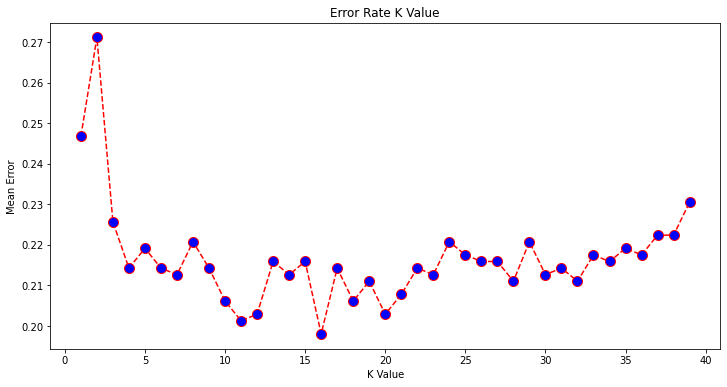

In [247]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [248]:
KNN = KNeighborsClassifier(n_neighbors=12)
KNN.fit(Train_X_Tfidf,Train_Y)
prediksi_KNN = KNN.predict(Test_X_Tfidf)

In [249]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [250]:
# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(Test_Y, prediksi_KNN))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(Test_Y,prediksi_KNN))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(Test_Y,prediksi_KNN))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(Test_Y, prediksi_KNN))

f1 score hasil prediksi adalah: 
0.8699271592091572
accuracy score hasil prediksi adalah: 
0.797077922077922
precision score hasil prediksi adalah: 
0.8180039138943248
recall score hasil prediksi adalah: 
0.9288888888888889


# CONFUSION MATRIX

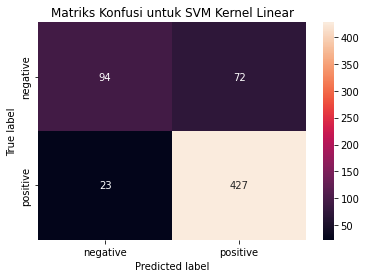

In [251]:
#Matrik Konfusi untuk SVM Kernel Linear
from sklearn.metrics import confusion_matrix
import seaborn as sns

konfusi_SVM1 = confusion_matrix(Test_Y,prediksi_SVM1)
class_label = ["negative", "positive"]
test1 = pd.DataFrame(konfusi_SVM1, index=class_label, columns=class_label)
sns.heatmap(test1, annot=True, fmt="d")
plt.title("Matriks Konfusi untuk SVM Kernel Linear")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

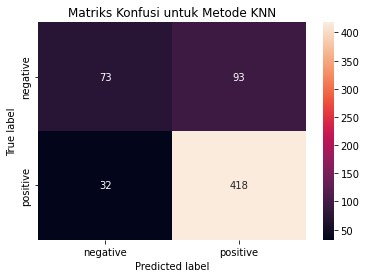

In [252]:
#Matrik Konfusi untuk KNN
from sklearn.metrics import confusion_matrix
import seaborn as sns

konfusi_KNN = confusion_matrix(Test_Y,prediksi_KNN)
class_label = ["negative", "positive"]
test2 = pd.DataFrame(konfusi_KNN, index=class_label, columns=class_label)
sns.heatmap(test2, annot=True, fmt="d")
plt.title("Matriks Konfusi untuk Metode KNN")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# VISUALISASI

# SENTIMEN NEGATIF

In [253]:
UlasanNegatif = ClassificationUlasanGojek.loc[ClassificationUlasanGojek['label']==0]
UlasanNegatif.sample(20)

,review,sentiment,label
1344,confirmation alert press subscription scam sub...,"{'neg': 0.314, 'neu': 0.588, 'pos': 0.098, 'co...",0
1400,new updates keep reinstalling opened crash eve...,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0
429,application used good past past id give stars ...,"{'neg': 0.271, 'neu': 0.605, 'pos': 0.124, 'co...",0
875,everytime try upgrade account application say ...,"{'neg': 0.315, 'neu': 0.582, 'pos': 0.103, 'co...",0
2397,worse aplication upgraded version use app also...,"{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compou...",0
727,loading time getting worse update took minutes...,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",0
150,convinience needed application busy lazy custo...,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'comp...",0
1159,app keeps saying server error whenever try ord...,"{'neg': 0.165, 'neu': 0.769, 'pos': 0.066, 'co...",0
1290,worst service gofood app allow change cancel o...,"{'neg': 0.238, 'neu': 0.637, 'pos': 0.125, 'co...",0
1343,crash crash crash force close open maps bug ch...,"{'neg': 0.469, 'neu': 0.531, 'pos': 0.0, 'comp...",0


In [254]:
import difflib

#body_list = df['body'].tolist()
negatif_text = UlasanNegatif['review'].tolist()
#body=body_list
review_negatif = negatif_text

In [255]:
#stopword
from nltk.corpus import stopwords
stopword = stopwords.words('english')
print(len(stopword))
text_negatif = str(negatif_text)

179


In [256]:
#tokenizing
from nltk.tokenize import word_tokenize
token_negatif = word_tokenize(text_negatif)

In [257]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [258]:
#filter out stopwords
from nltk.corpus import stopwords
stopworddd = set(stopwords.words('english'))
negatif = [w for w in token_negatif if not w in stopworddd]

negatif = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in negatif]

In [259]:
import string
table = str.maketrans('','', string.punctuation)
strippedneg = [w.translate(table) for w in negatif]

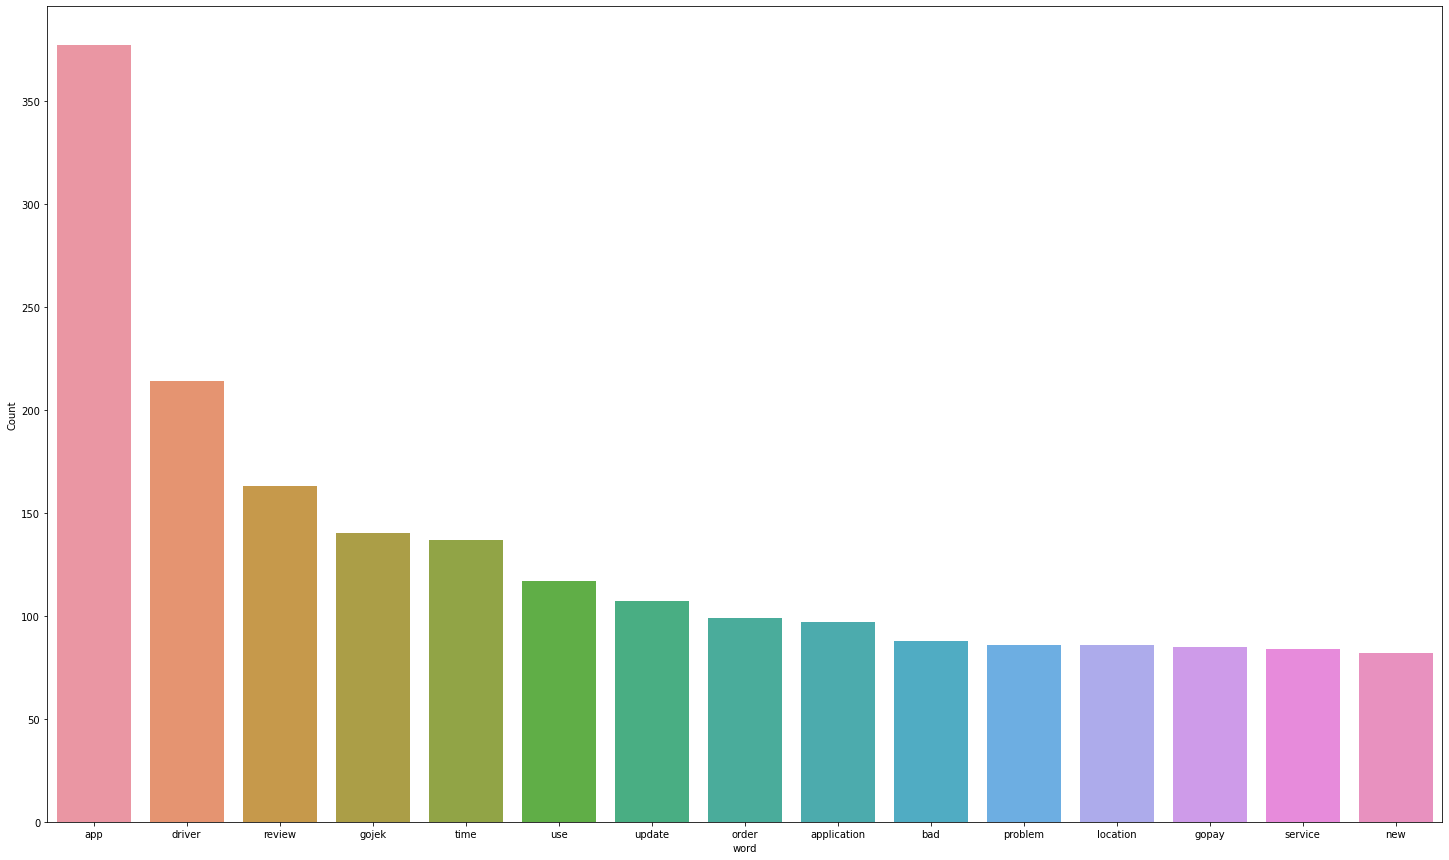

In [260]:
#Ploting kata negatif yang sering muncul
freq_words(strippedneg,15)

In [261]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


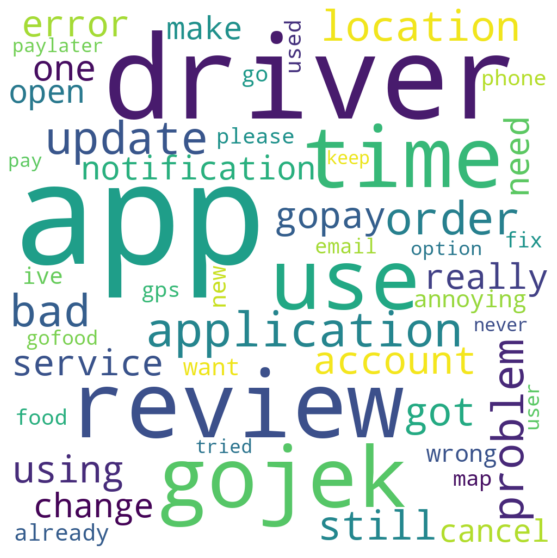

In [262]:
#WORD CLOUD NEGATIF
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

WC_negatif = ' '.join(str(word) for word in strippedneg)
wordcloud = WordCloud(max_font_size=260, max_words=50,width=1000, height=1000, mode='RGBA', background_color='white').generate(WC_negatif)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# SENTIMEN POSITIF

In [263]:
UlasanPositif = ClassificationUlasanGojek.loc[ClassificationUlasanGojek['label']==1]
UlasanPositif.sample(20)

,review,sentiment,label
287,features like grab way check prices select sta...,"{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...",1
254,app really helpful indonesia explore food trav...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",1
675,easy use effective super handy wellmade app,"{'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'comp...",1
2413,easy use useful,"{'neg': 0.0, 'neu': 0.147, 'pos': 0.853, 'comp...",1
407,overall good app please add share feature gofo...,"{'neg': 0.0, 'neu': 0.322, 'pos': 0.678, 'comp...",1
1078,helpfull application everything easy thank gojek,"{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'comp...",1
1547,new ui confusing please roll back previous ui ...,"{'neg': 0.126, 'neu': 0.641, 'pos': 0.233, 'co...",1
1220,awesome app makes travelling convenient,"{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'comp...",1
1546,app size getting bigger bigger nice,"{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp...",1
413,great taxi app singapore found comparatively c...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",1


In [264]:
import difflib

#body_list = df['body'].tolist()
positif_text = UlasanPositif['review'].tolist()
#body=body_list
review_positif = positif_text

In [265]:
#stopword
from nltk.corpus import stopwords
stopword = stopwords.words('english')
print(len(stopword))
text_positif = str(positif_text)

179


In [266]:
#tokenizing
from nltk.tokenize import word_tokenize
token_positif = word_tokenize(text_positif)

In [267]:
#filter out stopwords
from nltk.corpus import stopwords
stopworddd = set(stopwords.words('english'))
positif = [w for w in token_positif if not w in stopworddd]

positif = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in positif]

In [268]:
import string
table = str.maketrans('','', string.punctuation)
strippedpos = [w.translate(table) for w in positif]

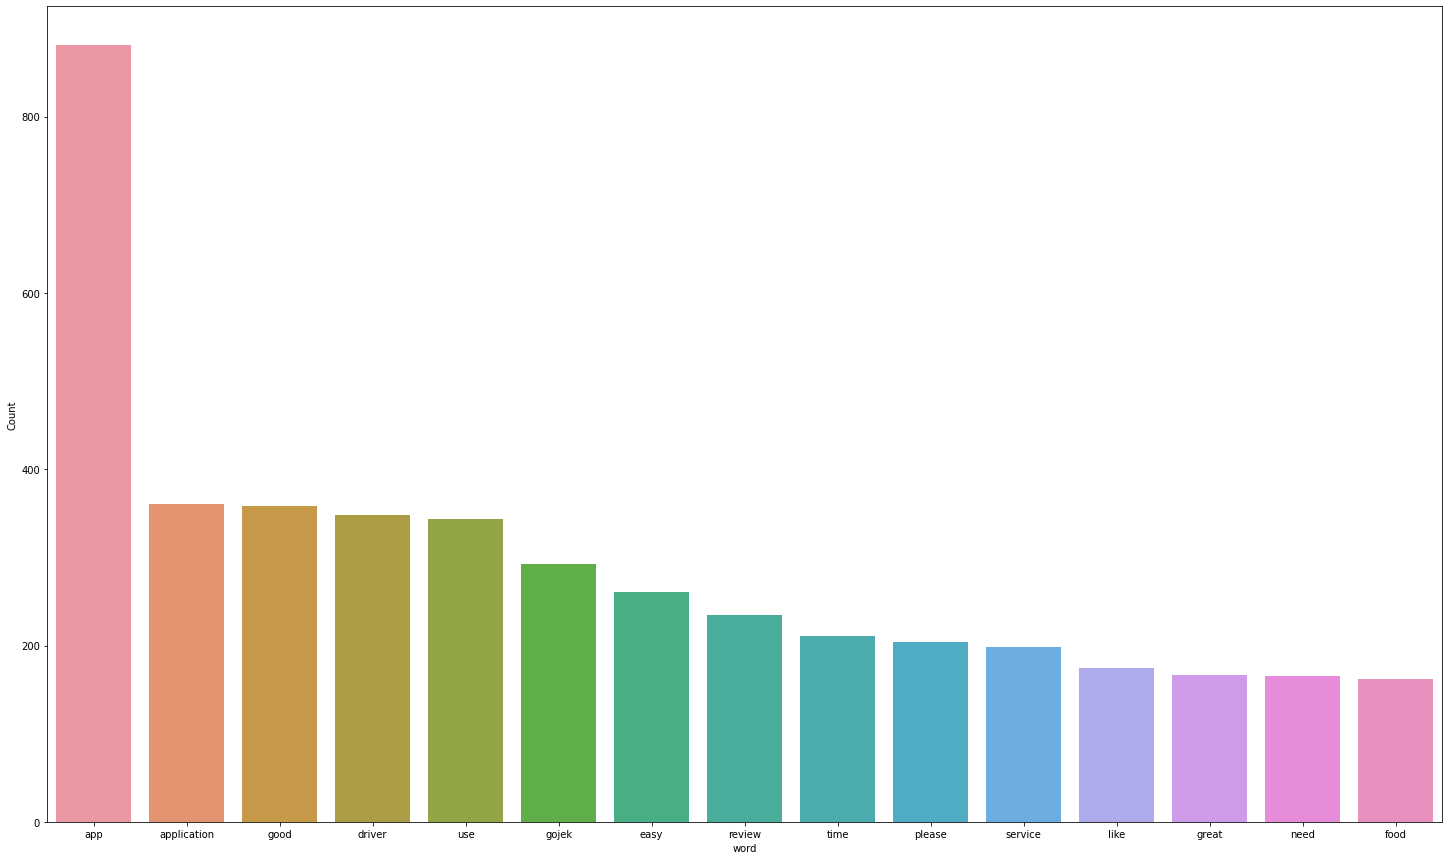

In [269]:
#Ploting kata positif yang sering muncul
freq_words(strippedpos,15)

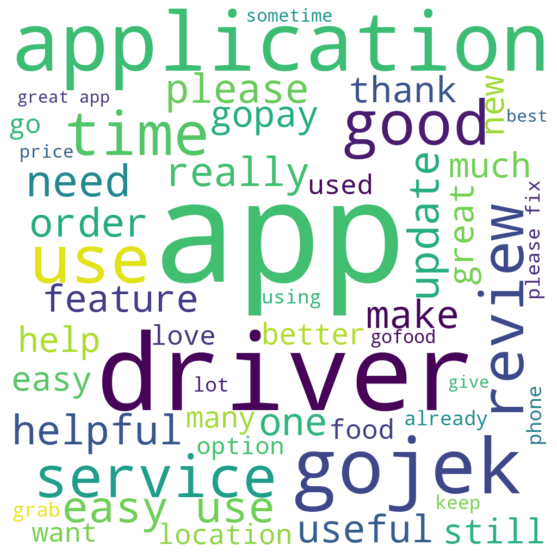

In [270]:
#WORD CLOUD POSITIF
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

WC_positif = ' '.join(str(word) for word in strippedpos)
wordcloud = WordCloud(max_font_size=260, max_words=50,width=1000, height=1000, mode='RGBA', background_color='white').generate(WC_positif)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# EVALUASI - TESTING PREDIKSI

PREDIKSI SVM

In [271]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [272]:
import string, re

def cleansing(data):
    # lower text
    data = data.lower()
    
    # hapus punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    
    # remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    
    # remove newline
    data = data.replace('\n', ' ')
    
    return data

In [273]:
def ujicoba(data):
    # cleansing data
    data = cleansing(data)
    
    # hapus stopwords
    from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    data = stopword.remove(data)
    
    # stemming
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    data = stemmer.stem(data)
    
    # count vectorizer
    data = Tfidf_vect.transform([data])
    
    return data

In [274]:
review1 = "very good apps and heplfull for every activity"
review2 = "poor application. simple requirement of how to use a credit card for paying bills cannot be found . unnecessary information too much."
review3 = "This app is helpfull for our mobility in most of major town in east java. Tks"
review4 = "App keeps saying that there is a server error whenever I try to order something. I have tried reinstalling the app. fuck"

In [275]:
SVM1.predict(ujicoba(review1))

array([1])

In [276]:
KNN.predict(ujicoba(review1))

array([1])

In [277]:
SVM1.predict(ujicoba(review2))

array([0])

In [278]:
KNN.predict(ujicoba(review2))

array([1])

In [279]:
SVM1.predict(ujicoba(review3))

array([1])

In [280]:
KNN.predict(ujicoba(review3))

array([1])

In [281]:
SVM1.predict(ujicoba(review4))

array([0])

In [282]:
KNN.predict(ujicoba(review4))

array([0])